# Dealing with multi-cell images

The default workflow asssumes that the image contains only a single cell. In many cases however the field of view might contain multiple cells. In that case, the plugin offers a way to indicate which cell should be processed. We use here again the data from [this Zenodo repository](https://zenodo.org/records/7944191) (Eike K Mahlandt, Sebastián Palacios Martínez, Janine JG Arts, Simon Tol, Jaap D van Buul, Joachim Goedhart (2023) Opto-RhoGEFs, an optimized optogenetic toolbox to reversibly control Rho GTPase activity on a global to subcellular scale, enabling precise control over vascular endothelial barrier strength eLife 12:RP84364 https://doi.org/10.7554/eLife.84364.3).

First we import the data:

In [ ]:
import napari
from napari.utils import nbscreenshot
from napari_morphodynamics.napari_gui import MorphoWidget
import numpy as np

viewer = napari.Viewer()
viewer.window.resize(1200,400)
self = MorphoWidget(viewer)

self.setMaximumWidth(550)

viewer.window.add_dock_widget(self)

self._on_click_select_file_folder(
    file_folder='../../../Projects_data/napari-morphodynamics/goedhart/zarr_format/210429_OptoG011_03_OptoTIAM.zarr/')
self.segm_channel.setCurrentRow(0)
for i in range(2):
    self.signal_channel.item(i).setSelected(True)
self._on_load_dataset()
nbscreenshot(viewer)

Now we need to segment the cells. Obviously, both convpaint and cellpose will segment all cells if we don't specify which cell to focus on.

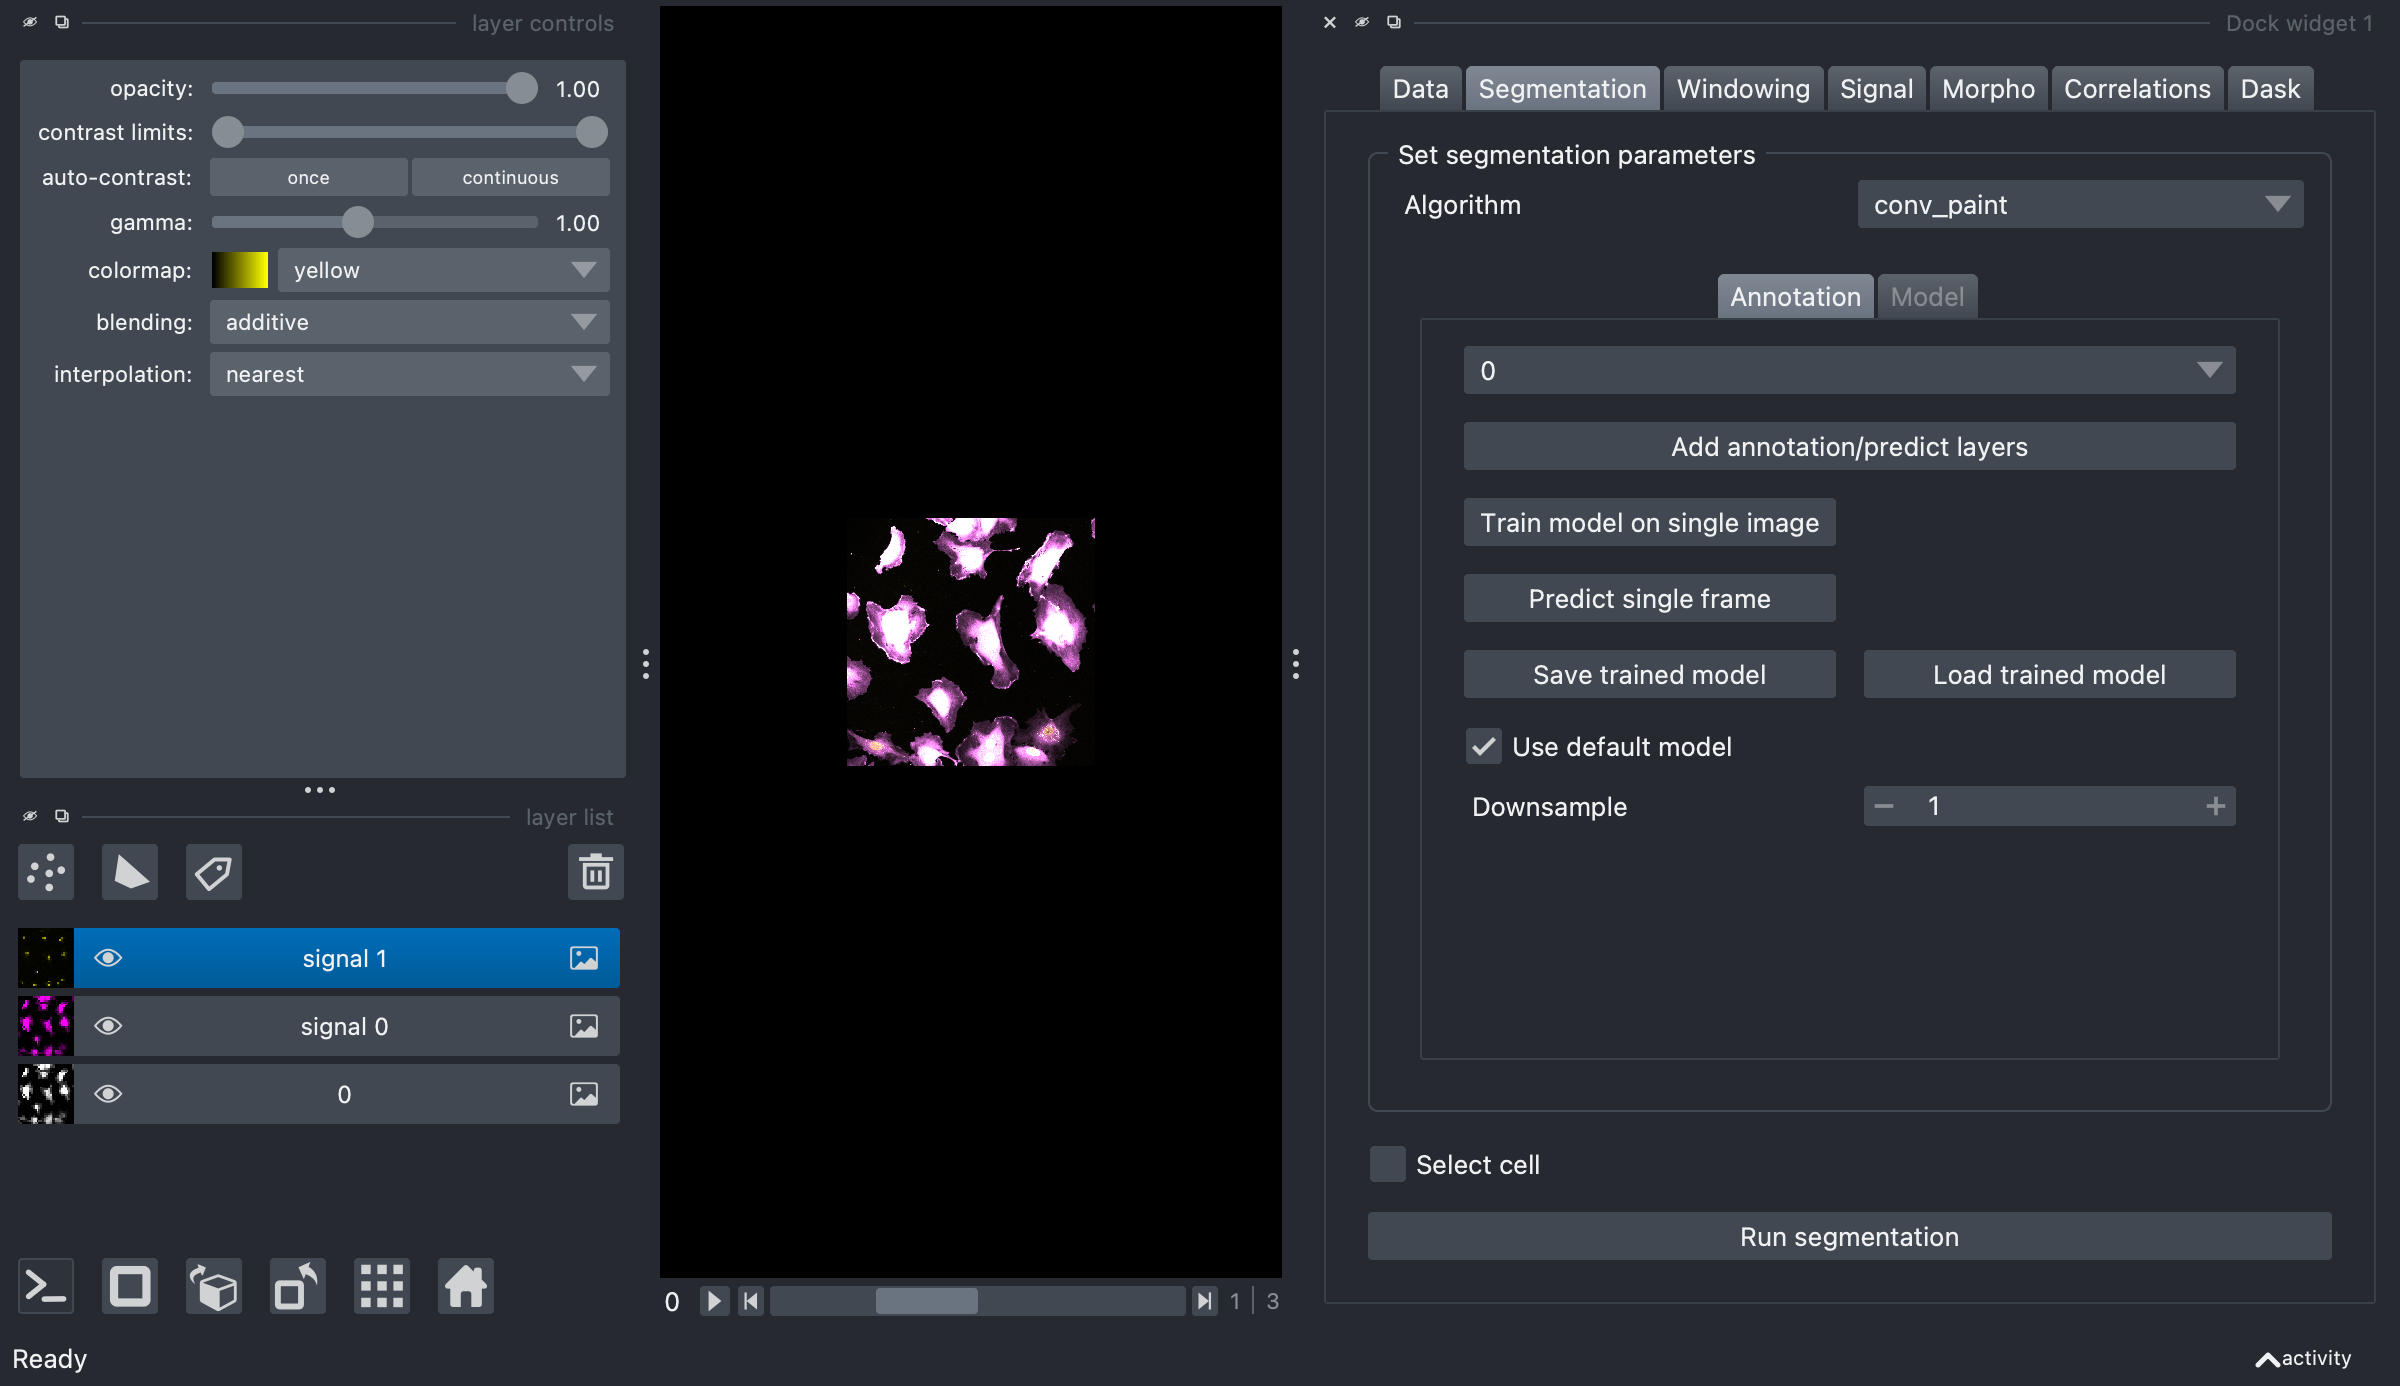

In [26]:
self.tabs.setCurrentIndex(1)
nbscreenshot(viewer)

At the bottom of the segmentation tab, there is an option for ```Select cell```. If this is selected, a new Points layer is added to the viewer containing a single point at the **first time point**. It's location will indicate to the plugin which cell to analyse:

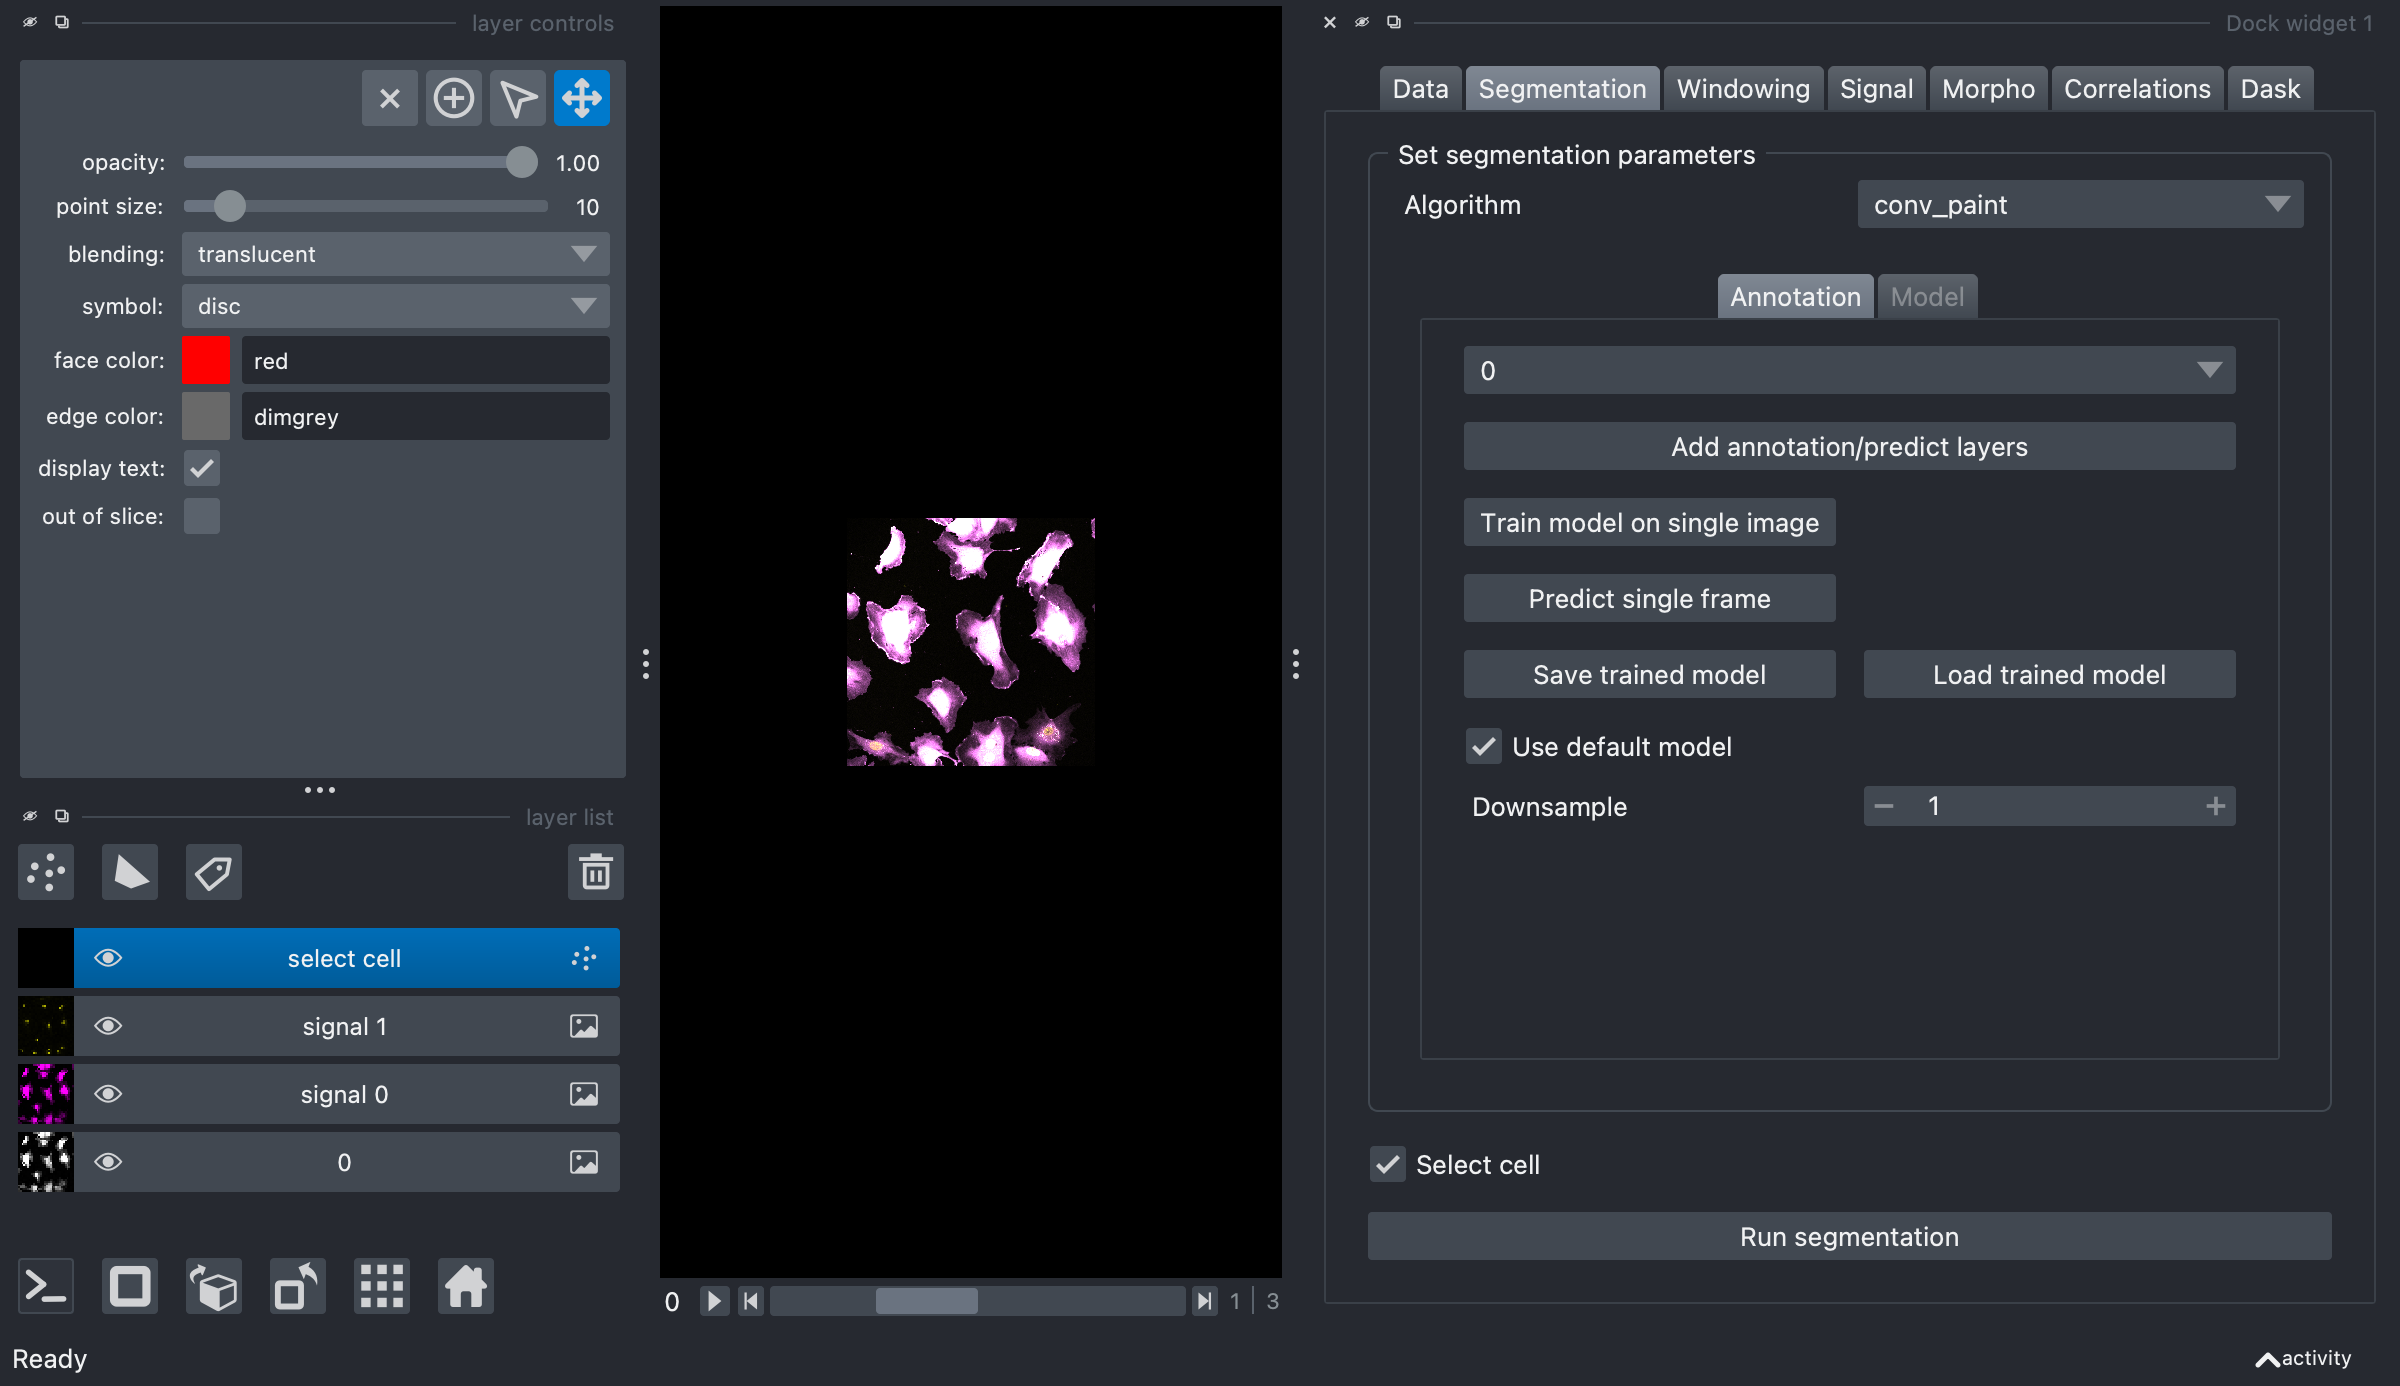

In [27]:
self.check_use_location.setChecked(True)
nbscreenshot(viewer)

By selecting the arrow tool you can move the point to the cell you want to analyze.

In [32]:
self.viewer.layers['select cell'].data = np.array([[  0, 522, 592]])


In [34]:
self.viewer.camera.center = (0.0, 403.2565376893992, 592.183844240704)
self.viewer.camera.zoom = 0.76

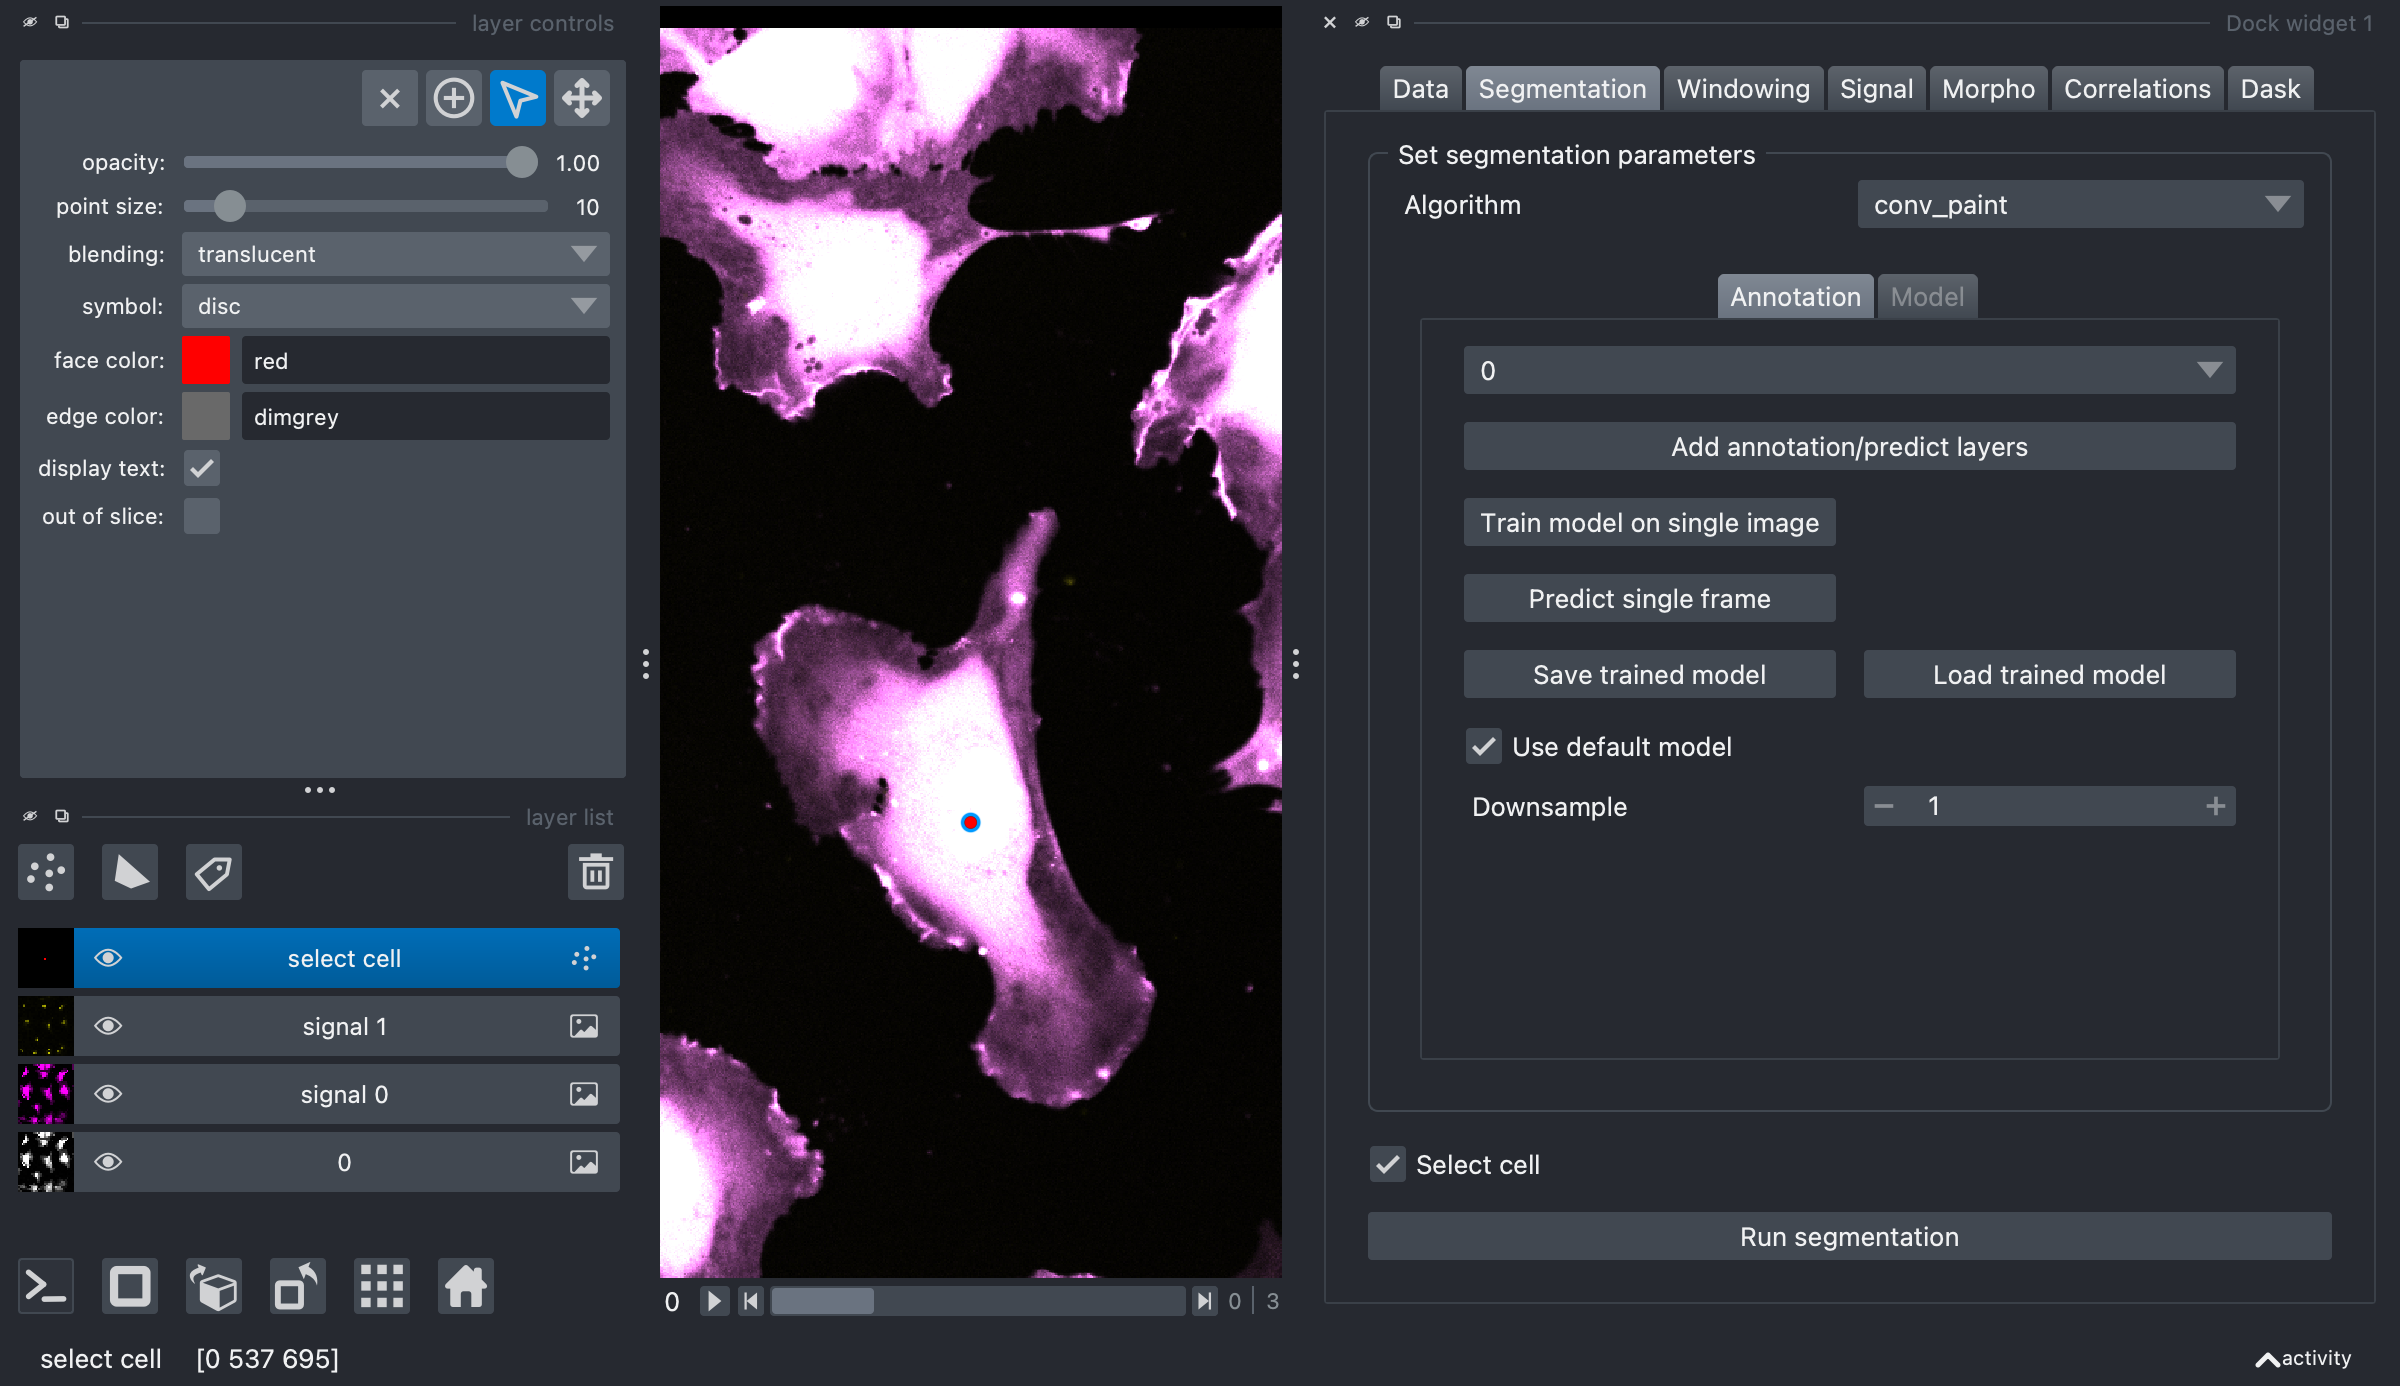

In [35]:
nbscreenshot(viewer)

When we then go the the segmentation step, everything works as usual, except that only the marked cell will be processed e.g. via the convpaint plugin: 

In [37]:
'''import skimage
skimage.io.imsave(
    '../../../Projects_data/napari-morphodynamics/goedhart/multi_cell_label.tif',
    viewer.layers['annotations'].data[0,:,:], check_contrast=False)
'''

"import skimage\nskimage.io.imsave(\n    '../../../Projects_data/napari-morphodynamics/goedhart/multi_cell_label.tif',\n    viewer.layers['annotations'].data[0,:,:], check_contrast=False)\n"

In [41]:
import skimage
labels = skimage.io.imread('../../../Projects_data/napari-morphodynamics/goedhart/multi_cell_label.tif')
self.conv_paint_widget.add_annotation_layer()

self._on_click_select_analysis(analysis_path='../../../Projects_data/napari-morphodynamics/goedhart/outputs/multi_cell/')

viewer.layers['annotations'].data[0,:,:] = labels

self.conv_paint_widget.update_classifier()
self._on_run_segmentation()

frame segmentation: 100%|██████████████████████████████████| 4/4 [00:09<00:00,  2.28s/it]


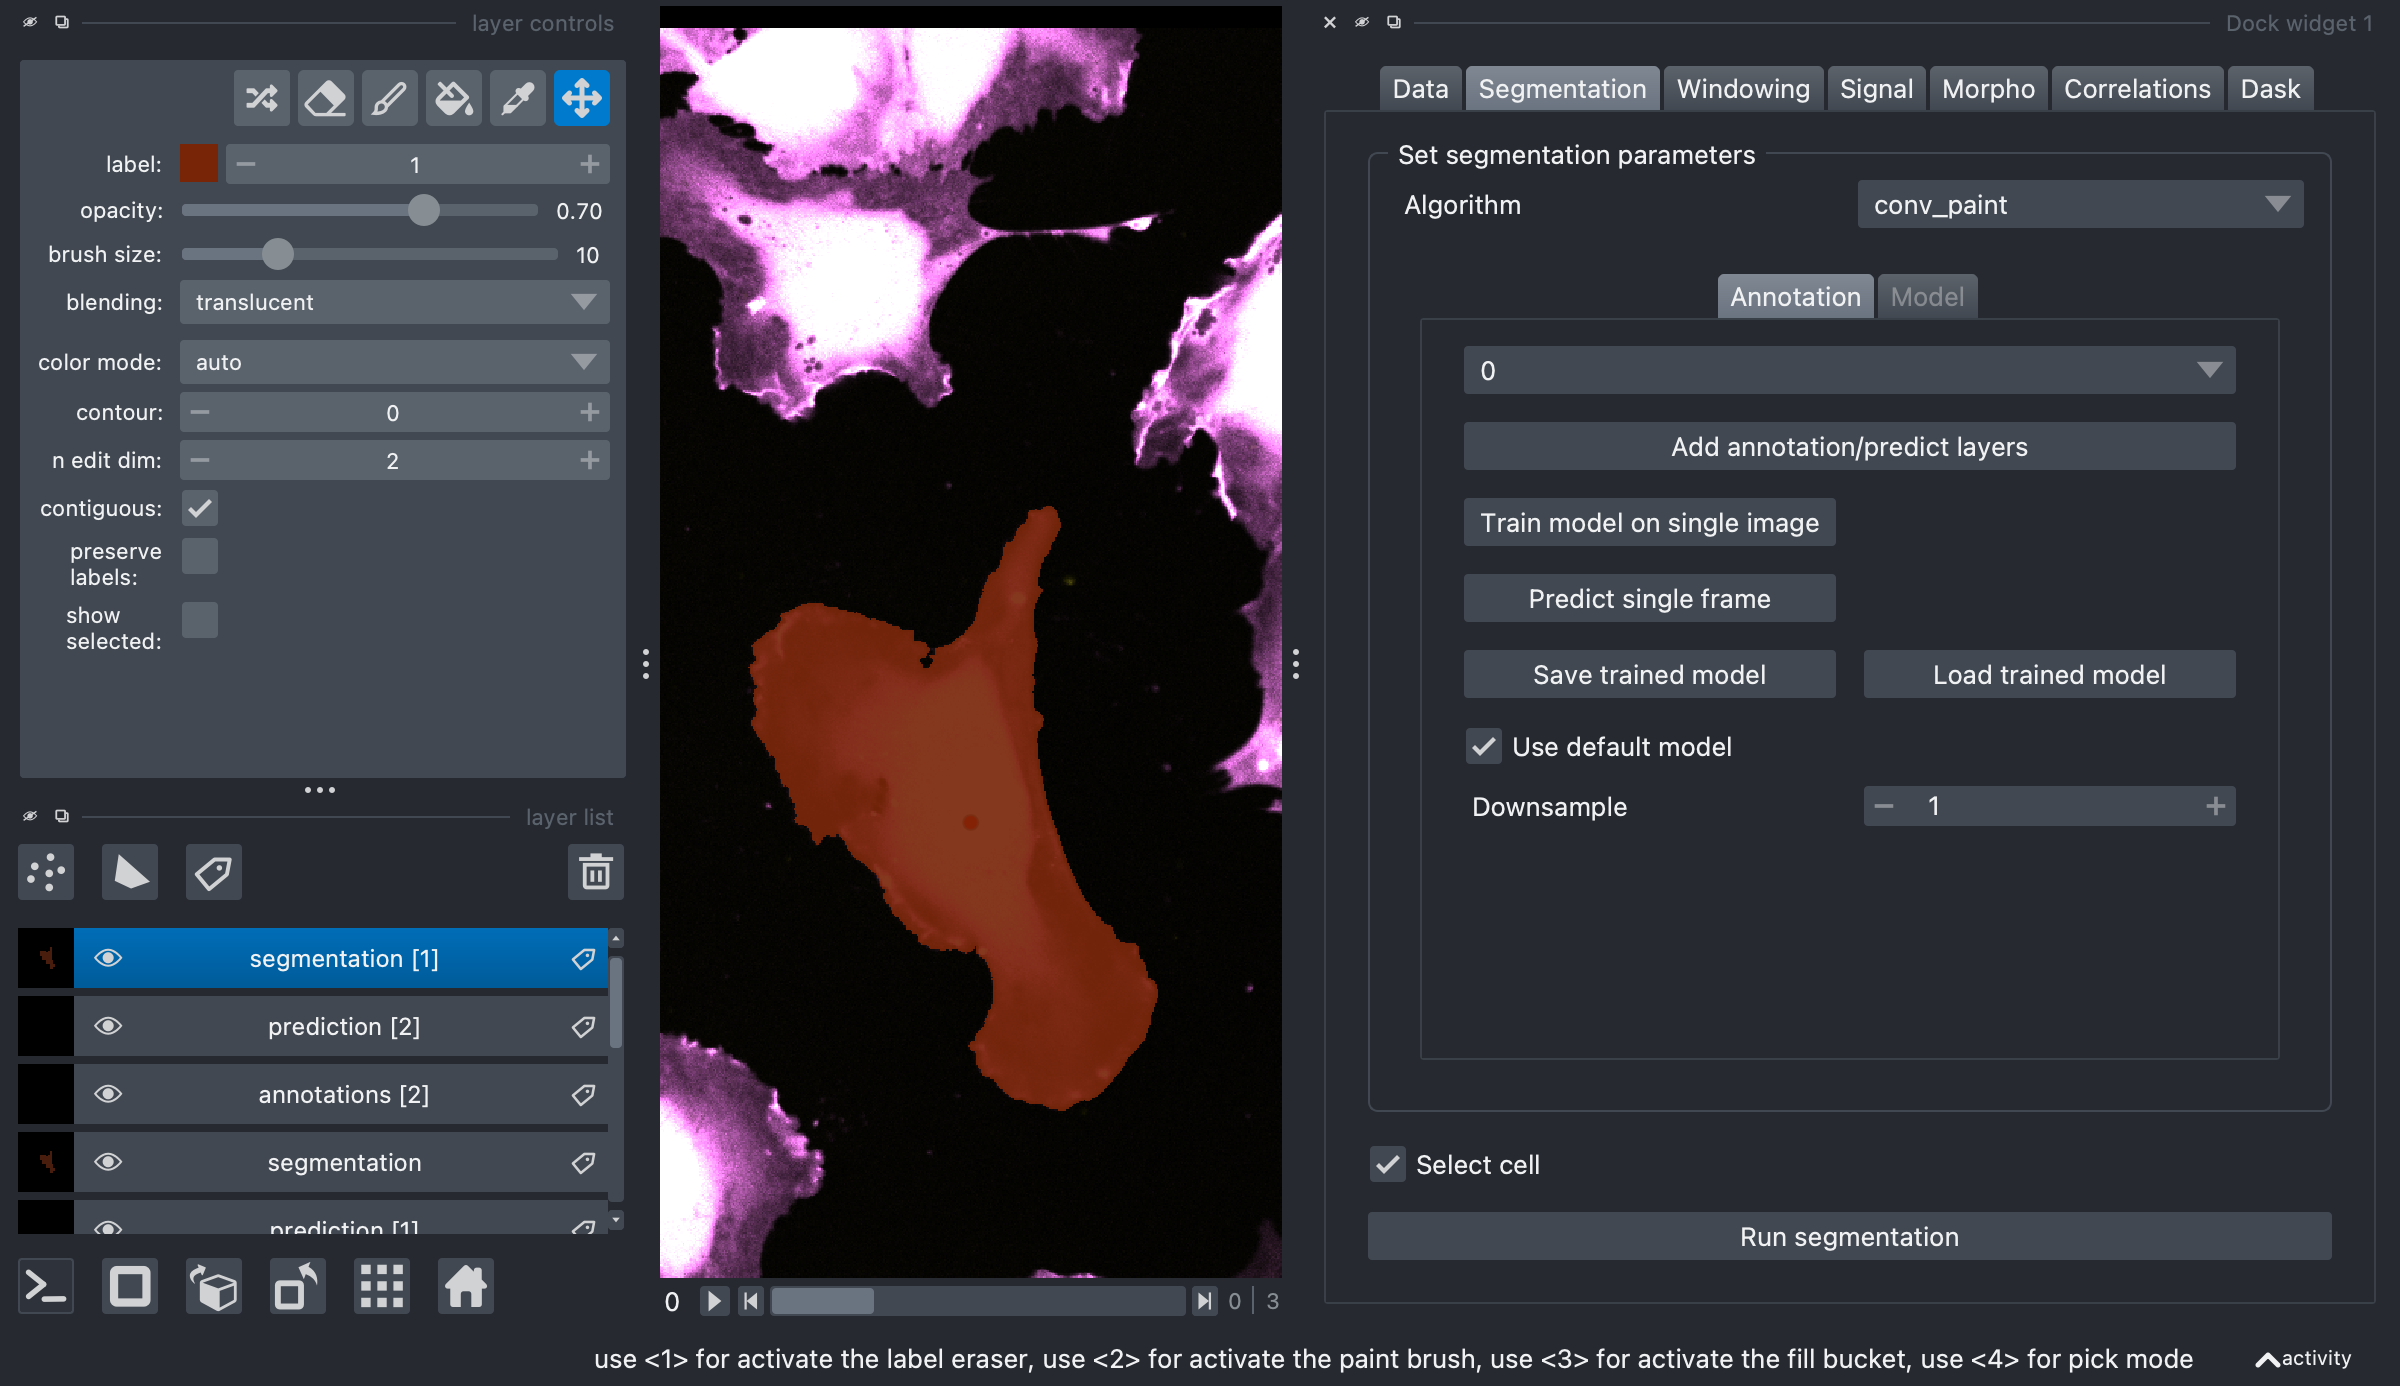

In [42]:
nbscreenshot(viewer)